In [6]:

import math
import numpy
from matplotlib import pyplot
# помещаем рисунки в блокнот
%matplotlib inline  
x_naca = numpy.loadtxt('./NACA0012_x.txt')
y_naca = numpy.loadtxt('./NACA0012_y.txt')
sigma_naca = numpy.loadtxt('./NACA0012_sigma.txt')

In [7]:
N = 151                     
x_start, x_end = -1.0, 2.0            
y_start, y_end = -0.5, 0.5            
x = numpy.linspace(x_start, x_end, N)    
y = numpy.linspace(y_start, y_end, N)    
X, Y = numpy.meshgrid(x, y)

In [8]:
u_inf = 1.0   
u_freestream = u_inf * numpy.ones((N, N), dtype=float)
v_freestream = numpy.zeros((N, N), dtype=float)

psi_freestream = u_inf * Y

In [9]:
def get_velocity(strength, xs, ys, X, Y):
    
    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v
def get_stream_function(strength, xs, ys, X, Y):
    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    return psi


In [10]:
U = numpy.zeros((N, N), dtype=float)
V = numpy.zeros((N, N), dtype=float)
psi = numpy.zeros((N, N), dtype=float)
for i in range(x_naca.size):
    u, v = get_velocity(sigma_naca[i],x_naca[i],y_naca[i], X, Y)
    U += u
    V += v
    psi += get_stream_function(sigma_naca[i],x_naca[i],y_naca[i], X, Y)

U += u_freestream
V += v_freestream
psi += psi_freestream

    

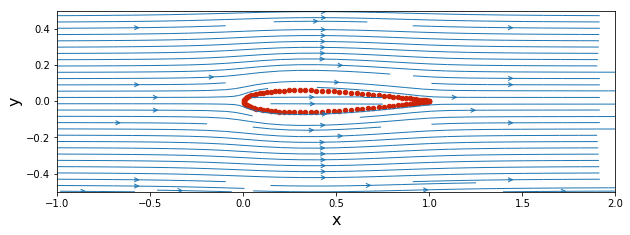

In [11]:
# рисуем линии тока
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)
pyplot.streamplot(X, Y, U, V, density=1, linewidth=1, arrowsize=1,\
                  arrowstyle='->')
pyplot.scatter(x_naca, y_naca, color='#CD2305', s=20, marker='o')


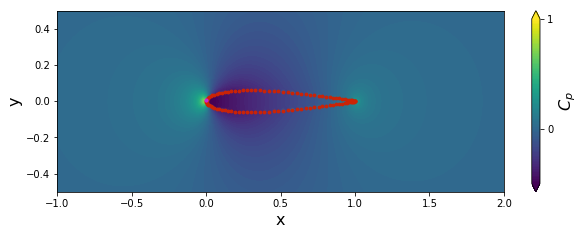

In [12]:
# вычисляем поле коэффициента давления
cp = 1.0 - (U**2+V**2)/u_inf**2
size = 10
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start, x_end)
pyplot.ylim(y_start, y_end)


contf = pyplot.contourf(X, Y, cp, levels = numpy.linspace(-0.5, 1.0, 100), extend = 'both')
cbar = pyplot.colorbar(contf)
cbar.set_label('$C_p$', fontsize=16)
cbar.set_ticks([-2.0, -1.0, 0.0, 1.0])
pyplot.scatter(x_naca, y_naca, color='#CD2305',\
               s=8, marker='o')
pyplot.scatter(x[numpy.where(cp == numpy.amax(cp))[1]], y[numpy.where(cp==numpy.amax(cp))[0]], color='#CD23D5',\
               s=10, marker='o')


In [13]:
x[numpy.where(cp == numpy.amax(cp))[1]], y[numpy.where(cp==numpy.amax(cp))[0]]


(array([0.]), array([0.00666667]))

In [14]:
numpy.amax(cp)

0.8621813581358755